# Import bibliotek

In [1]:
import os
import shutil
import librosa
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
from PIL import Image

Do zbudowania naszego zbioru danych wykorzystamy trzy zbiory:
*  KAUH
*  ICBHI
*  Covid-19

In [2]:
# ścieżki do katalogów z danymi
RAW_DATA_PATH = "./Raw_datasets/"
KAUH_DATA_PATH = f"./{RAW_DATA_PATH}/KAUH_Lung_files"
ICBHI_DATA_PATH = f"./{RAW_DATA_PATH}/Respiratory_Sound_Database"
COVID_19_DATA_PATH = f"./{RAW_DATA_PATH}/covid-19_dataset"

In [3]:
# Sprawdzanie poprawności ścieżek folderów
print("RAW DATA: ", os.path.exists(RAW_DATA_PATH))
print("KAUH: ", os.path.exists(KAUH_DATA_PATH))
print("ICBHI: ", os.path.exists(ICBHI_DATA_PATH))
print("COVID-19: ", os.path.exists(COVID_19_DATA_PATH))

RAW DATA:  True
KAUH:  True
ICBHI:  True
COVID-19:  True


# Przetwarzanie zbioru ICBHI

### Wczytanie danych o chorobach pacjentów

In [4]:
patient_diseases_info = pd.read_csv(f'./{ICBHI_DATA_PATH}/patient_diagnosis.csv')
patient_diseases_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PatientID  126 non-null    int64 
 1   Diagnosis  126 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [5]:
unique_diseases_icbhi = patient_diseases_info['Diagnosis'].unique()
unique_diseases_icbhi = sorted(unique_diseases_icbhi)
print(f'Unikalne nazwy chorób płucnych: {unique_diseases_icbhi}')

Unikalne nazwy chorób płucnych: ['Asthma', 'Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy', 'LRTI', 'Pneumonia', 'URTI']


                Ilość pacjentów:
Diagnosis                       
COPD                          64
Healthy                       26
URTI                          14
Bronchiectasis                 7
Bronchiolitis                  6
Pneumonia                      6
LRTI                           2
Asthma                         1


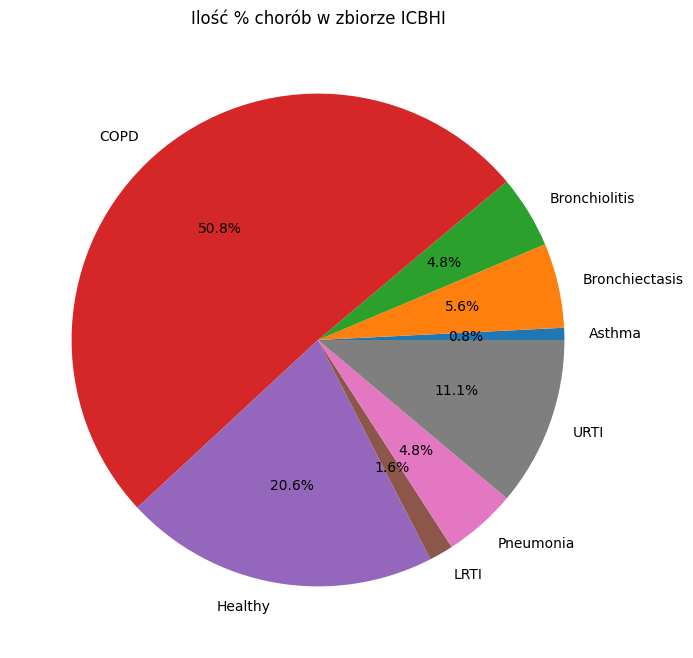

In [6]:
number_of_diseases = patient_diseases_info.groupby(['Diagnosis']).count()
print(number_of_diseases.sort_values(by=['PatientID'],ascending=False).rename(columns = {'PatientID':'Ilość pacjentów:'}))
plt.figure(figsize=(10,8))
plt.pie(number_of_diseases['PatientID'],labels=number_of_diseases.index,autopct='%1.1f%%')
plt.title("Ilość % chorób w zbiorze ICBHI")
plt.show()

### Segregacja plików audio ze względu na choroby 

In [7]:
#Tworzenie głównego folderu z danymi
if not os.path.exists('./data'):
    print("TWORZENIE KATALOGU GŁÓWNEGO")
    os.mkdir("./data")

#Tworzenie folderu dla audio
if not os.path.exists('./data/audio'):
    print("TWORZENIE KATALOGU DLA AUDIO")
    os.mkdir("./data/audio")

#Tworzenie podfolderów audio
for diseas in unique_diseases_icbhi:
    if not os.path.exists(f"./data/audio/{diseas}"):
        print(f"TWORZENIE PODKATALOGU DLA AUDIO CHOROB : {diseas}")
        os.mkdir(f"./data/audio/{diseas}")


TWORZENIE KATALOGU DLA AUDIO
TWORZENIE PODKATALOGU DLA AUDIO CHOROB : Asthma
TWORZENIE PODKATALOGU DLA AUDIO CHOROB : Bronchiectasis
TWORZENIE PODKATALOGU DLA AUDIO CHOROB : Bronchiolitis
TWORZENIE PODKATALOGU DLA AUDIO CHOROB : COPD
TWORZENIE PODKATALOGU DLA AUDIO CHOROB : Healthy
TWORZENIE PODKATALOGU DLA AUDIO CHOROB : LRTI
TWORZENIE PODKATALOGU DLA AUDIO CHOROB : Pneumonia
TWORZENIE PODKATALOGU DLA AUDIO CHOROB : URTI


In [8]:
#Segregacja plików audio ze względu na choroby
for diseas in unique_diseases_icbhi:
    print(f'CHOROBA {diseas}')

    #Szukanie po chorobie
    patient_list = patient_diseases_info[patient_diseases_info['Diagnosis'] == diseas]
    print(patient_list)
    
    for patient_id in patient_list['PatientID']:
        patient_files = glob.glob(f'{ICBHI_DATA_PATH}/audio_and_txt_files/{patient_id}*.wav')

        print(f'Pliki pacjenta: {patient_files}')

        for patient_file in patient_files:
            print("KOPIOWANIE: ",patient_file)
            shutil.copy(patient_file, f'./data/audio/{diseas}')

print("Pliki zostały posegregowane...")


CHOROBA Asthma
   PatientID Diagnosis
2        103    Asthma
Pliki pacjenta: ['././Raw_datasets//Respiratory_Sound_Database/audio_and_txt_files\\103_2b2_Ar_mc_LittC2SE.wav']
KOPIOWANIE:  ././Raw_datasets//Respiratory_Sound_Database/audio_and_txt_files\103_2b2_Ar_mc_LittC2SE.wav
CHOROBA Bronchiectasis
     PatientID       Diagnosis
10         111  Bronchiectasis
15         116  Bronchiectasis
67         168  Bronchiectasis
68         169  Bronchiectasis
95         196  Bronchiectasis
100        201  Bronchiectasis
114        215  Bronchiectasis
Pliki pacjenta: ['././Raw_datasets//Respiratory_Sound_Database/audio_and_txt_files\\111_1b2_Tc_sc_Meditron.wav', '././Raw_datasets//Respiratory_Sound_Database/audio_and_txt_files\\111_1b3_Tc_sc_Meditron.wav']
KOPIOWANIE:  ././Raw_datasets//Respiratory_Sound_Database/audio_and_txt_files\111_1b2_Tc_sc_Meditron.wav
KOPIOWANIE:  ././Raw_datasets//Respiratory_Sound_Database/audio_and_txt_files\111_1b3_Tc_sc_Meditron.wav
Pliki pacjenta: ['././Raw_datas

In [9]:
#Tworzenie folderu dla spectogramów
if not os.path.exists('./data/spectograms'):
    print("TWORZENIE KATALOGU DLA SPEKTOGRAMÓW")
    os.mkdir("./data/spectograms")

#Tworzenie podfolderów spectogramów
for diseas in unique_diseases_icbhi:
    if not os.path.exists(f"./data/spectograms/{diseas}"):
        print(f"TWORZENIE PODKATALOGU DLA SPEKTOGRAMÓW CHOROBY : {diseas}")
        os.mkdir(f"./data/spectograms/{diseas}")

TWORZENIE KATALOGU DLA SPEKTOGRAMÓW
TWORZENIE PODKATALOGU DLA SPEKTOGRAMÓW CHOROBY : Asthma
TWORZENIE PODKATALOGU DLA SPEKTOGRAMÓW CHOROBY : Bronchiectasis
TWORZENIE PODKATALOGU DLA SPEKTOGRAMÓW CHOROBY : Bronchiolitis
TWORZENIE PODKATALOGU DLA SPEKTOGRAMÓW CHOROBY : COPD
TWORZENIE PODKATALOGU DLA SPEKTOGRAMÓW CHOROBY : Healthy
TWORZENIE PODKATALOGU DLA SPEKTOGRAMÓW CHOROBY : LRTI
TWORZENIE PODKATALOGU DLA SPEKTOGRAMÓW CHOROBY : Pneumonia
TWORZENIE PODKATALOGU DLA SPEKTOGRAMÓW CHOROBY : URTI


# Etapy tworzenia spektogramów dla pliku audio

In [10]:
audio_files = glob.glob('../lung_diseases_detection/data/audio/*/*.wav')
audio_files[1]

'../lung_diseases_detection/data/audio\\Bronchiectasis\\111_1b2_Tc_sc_Meditron.wav'

In [11]:
# Plik audio
ipd.Audio(audio_files[1])

In [12]:
# Wczytanie pliku
wave, sr = librosa.load(audio_files[1])

print(f'Wave: {wave[:10]}')
print(f'shape Wave: {wave.shape}')
print(f'SAMPLE RATE: {sr}')

Wave: [-0.00200442 -0.00318893 -0.00332277 -0.00359193 -0.00384032 -0.00405994
 -0.00402486 -0.00377632 -0.00332576 -0.00300147]
shape Wave: (441001,)
SAMPLE RATE: 22050


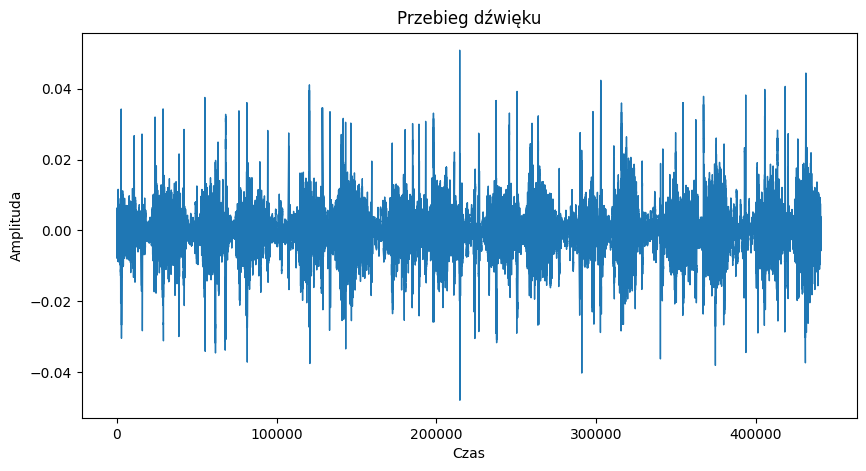

In [13]:
#Surowy przebieg pliku
pd.Series(wave).plot(figsize=(10, 5),
                  lw=1,
                  title='Przebieg dźwięku')
plt.ylabel('Amplituda')
plt.xlabel('Czas')
plt.show()


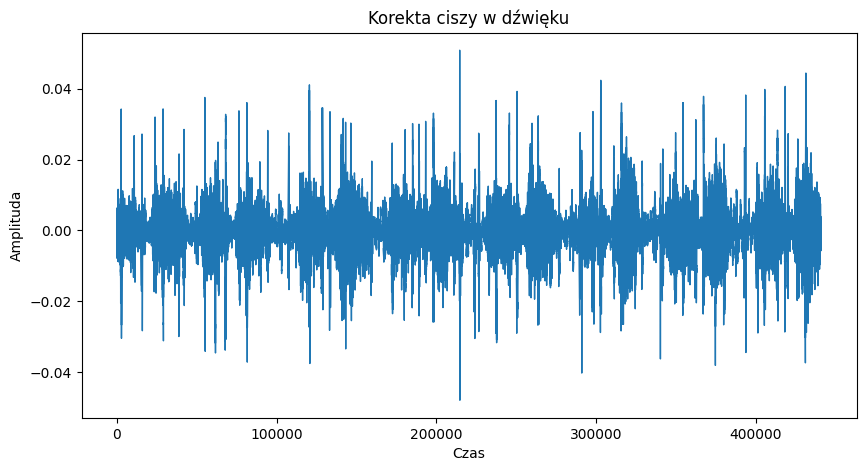

In [14]:
# Korekta ciszy dźwięku w audio
wave_trimmed, _ = librosa.effects.trim(wave, top_db=40)
pd.Series(wave_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Korekta ciszy w dźwięku')
plt.ylabel('Amplituda')
plt.xlabel('Czas')
plt.show()

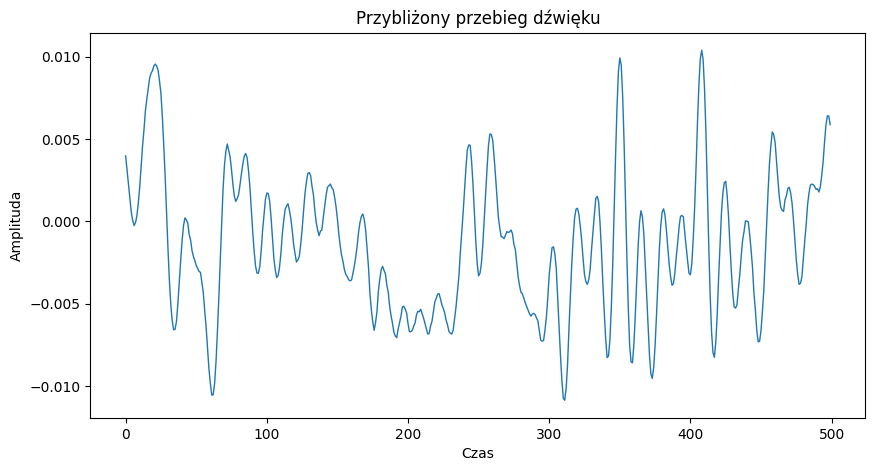

In [15]:
# Przybliżony przebieg dźwięku
pd.Series(wave[30000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Przybliżony przebieg dźwięku')
plt.ylabel('Amplituda')
plt.xlabel('Czas')
plt.show()

In [16]:
# Tranformata Fouriera
D = librosa.stft(wave)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape


(1025, 862)

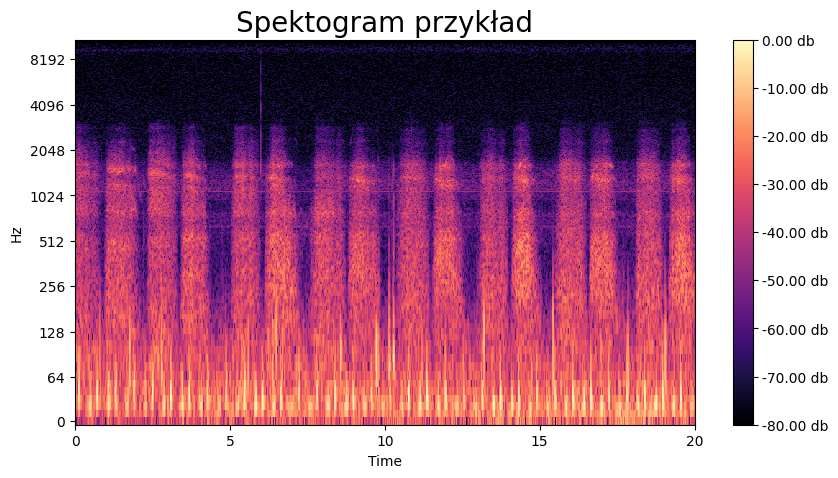

In [18]:
# Spektogram z dźwięku
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spektogram przykład', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f db')
plt.show()

In [19]:
# Tworzenie spektogramu mel
mel_spec = librosa.feature.melspectrogram(y=wave,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(mel_spec, ref=np.max)

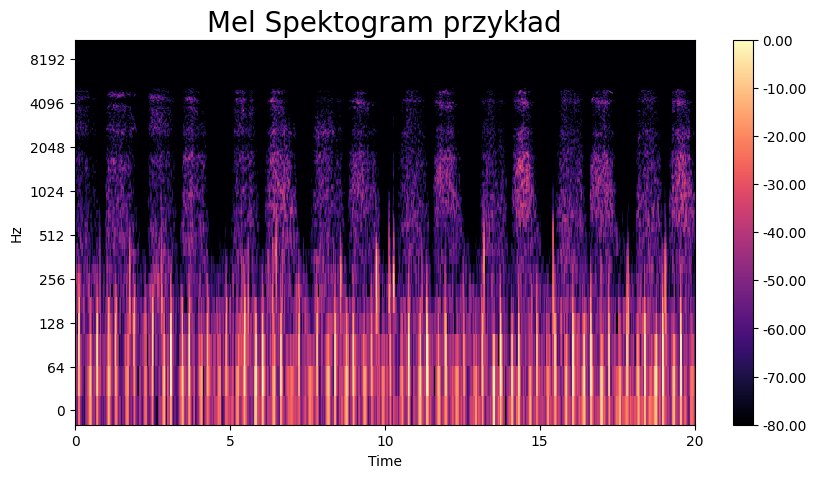

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
# Spektogram mel
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spektogram przykład', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

## Tworzenie dataset'u

In [22]:
SAMPLE_RATE = 24000
CHUNK_LENGTH = 3 # w sekundach

In [23]:
def save_spectogram(spectogram,class_name,file, index = 0):
    file_name = file[:-5]
    #print(file_name)

    #Zapis spektogramu
    saved_path = os.path.join(f'./data/spectograms/{class_name}/{file_name}_{index}.png')
    print(saved_path)

    image = Image.fromarray(spectogram * 255).convert("L")
    image.save(saved_path)

In [24]:
def get_mel_spectograms(filepath,sample_rate=22000,image_shape=(224,224)):
    #Wczytanie pliku audio
    wave, rate = librosa.load(path = filepath, sr = sample_rate)

    #Podział dźwięku na odcinki
    signal_splits = []

    for i in range(0,len(wave),int(CHUNK_LENGTH * SAMPLE_RATE)):
        chunk = wave[i:i + int(CHUNK_LENGTH * SAMPLE_RATE)]

        if len(chunk) < int(CHUNK_LENGTH * SAMPLE_RATE):
            break
        
        signal_splits.append(chunk)

    #Tworzenie mel spektogramu dla kazdego z odcinka
    ready_mel_spectograms = []

    for chunk in signal_splits:

        mel_spectogram = librosa.feature.melspectrogram(y = chunk,
                                                        sr = rate,
                                                        n_fft = 1024,
                                                        hop_length = 512,
                                                        n_mels = image_shape[0] * 1,
                                                        fmin = 100,
                                                        fmax = 24000)
        
        mel_spectogram = librosa.amplitude_to_db(mel_spectogram, ref = np.max)
        #Normalizacja
        mel_spectogram -= mel_spectogram.min()
        mel_spectogram /= mel_spectogram.max()

        #Dodanie melspektogramu do listy
        ready_mel_spectograms.append(mel_spectogram)

    return np.array(ready_mel_spectograms)

In [25]:
def prepare_spectograms():

    class_names = os.listdir('./data/audio')
    print(f"Nazwy klas: {class_names}")

    for class_name in class_names:
        files_disease = os.listdir(f'./data/audio/{class_name}')

        for file in files_disease:
            print(f"{class_name} - > {file}")

            mel_spectograms = get_mel_spectograms(f'./data/audio/{class_name}/{file}', sample_rate = SAMPLE_RATE)

            
            #Zapis spektogramów
            for idx, spec in enumerate(mel_spectograms):
                save_spectogram(spectogram = spec, class_name = class_name, file = file,index = idx)            
            

    print("SPEKTOGRAMY ZOSTAŁY PRZYGOTOWANE...")

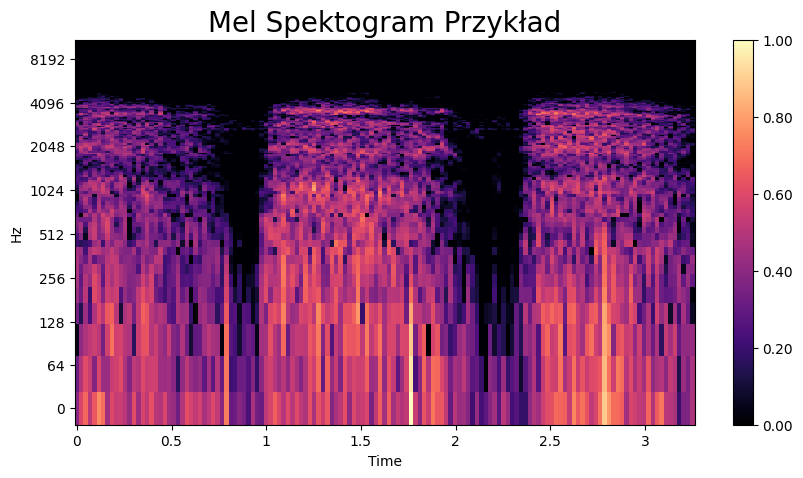

In [27]:
test = get_mel_spectograms('./data/audio/Bronchiectasis/111_1b2_Tc_sc_Meditron.wav')

fig, ax = plt.subplots(figsize=(10, 5))
# Spektogram mel
img = librosa.display.specshow(test[0],
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spektogram Przykład', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

## Przygotowanie spektogramów z plików audio

In [28]:
prepare_spectograms()

Nazwy klas: ['Asthma', 'Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy', 'LRTI', 'Pneumonia', 'URTI']
Asthma - > 103_2b2_Ar_mc_LittC2SE.wav
./data/spectograms/Asthma/103_2b2_Ar_mc_LittC2S_0.png
./data/spectograms/Asthma/103_2b2_Ar_mc_LittC2S_1.png
./data/spectograms/Asthma/103_2b2_Ar_mc_LittC2S_2.png
./data/spectograms/Asthma/103_2b2_Ar_mc_LittC2S_3.png
./data/spectograms/Asthma/103_2b2_Ar_mc_LittC2S_4.png
./data/spectograms/Asthma/103_2b2_Ar_mc_LittC2S_5.png
Bronchiectasis - > 111_1b2_Tc_sc_Meditron.wav
./data/spectograms/Bronchiectasis/111_1b2_Tc_sc_Meditro_0.png
./data/spectograms/Bronchiectasis/111_1b2_Tc_sc_Meditro_1.png
./data/spectograms/Bronchiectasis/111_1b2_Tc_sc_Meditro_2.png
./data/spectograms/Bronchiectasis/111_1b2_Tc_sc_Meditro_3.png
./data/spectograms/Bronchiectasis/111_1b2_Tc_sc_Meditro_4.png
./data/spectograms/Bronchiectasis/111_1b2_Tc_sc_Meditro_5.png
Bronchiectasis - > 111_1b3_Tc_sc_Meditron.wav
./data/spectograms/Bronchiectasis/111_1b3_Tc_sc_Meditro_0.png
./data

 # Przygotowanie danych ze zbioru KAUH

In [29]:
kauh_dataset = pd.read_excel(f'{KAUH_DATA_PATH}/Data annotation.xlsx',usecols=range(5))
kauh_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         112 non-null    int64 
 1   Gender      112 non-null    object
 2   Location    112 non-null    object
 3   Sound type  112 non-null    object
 4   Diagnosis   112 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.5+ KB


In [30]:
unique_diseases_kauh = kauh_dataset['Diagnosis'].unique()

print(unique_diseases_kauh)

['Asthma' 'Heart Failure + Lung Fibrosis ' 'Heart Failure + COPD'
 'Plueral Effusion' 'Heart Failure' 'heart failure' 'COPD' 'pneumonia'
 'Asthma and lung fibrosis' 'BRON' 'Lung Fibrosis' 'copd' 'asthma' 'N']


In [31]:
diseases_kauh_count = kauh_dataset.groupby('Diagnosis').count()
print(diseases_kauh_count['Age'].sort_values(ascending=False))

Diagnosis
N                                 35
Asthma                            17
asthma                            15
heart failure                     15
COPD                               8
pneumonia                          5
Lung Fibrosis                      4
BRON                               3
Heart Failure                      3
Heart Failure + COPD               2
Plueral Effusion                   2
Asthma and lung fibrosis           1
Heart Failure + Lung Fibrosis      1
copd                               1
Name: Age, dtype: int64


## Segregowanie danych

In [32]:
kauh_disease_dir = {'Asthma': ['Asthma','Asthma and lung fibrosis','asthma'],
                    'Bronchiectasis' : ['BRON'],
                    'COPD': ['COPD','copd'],
                    'Heart_Failure': ['heart failure','Heart Failure','Heart Failure + COPD'],
                    'Healthy': ['N'],
                    'Pneumonia' : ['pneumonia']}

kauh_disease_file_list = {'Asthma': [],
                        'Bronchiectasis' : [],
                        'COPD': [],
                        'Heart_Failure': [],
                        'Healthy': [],
                        'Pneumonia' : []}

In [33]:
import re

kauh_files = os.listdir(f'{KAUH_DATA_PATH}/Audio Files/')

#print(kauh_files)

for key_category, diseases_list in kauh_disease_dir.items():
    print(f'Category -> {key_category}')

    for disease in diseases_list:
        print(f'\t -> : {disease}')

        #Segregowanie plików audio ze względu na nazwy
        find_names = []
        
        for file in kauh_files:
            is_find = re.search(f"_{disease},",file)

            if is_find != None:
                print(f' --> {file}')
                kauh_disease_file_list[key_category].append(file)

#for key_category, diseases_list in kauh_disease_file_list.items():
#   print(diseases_list)

Category -> Asthma
	 -> : Asthma
 --> BP101_Asthma,E W,P L M,12,F.wav
 --> BP104_Asthma,E W,P L U,45,F.wav
 --> BP106_Asthma,E W,P L U,45,F.wav
 --> BP107_Asthma,E W,P L U,59,F.wav
 --> BP10_Asthma,E W,P R U,59,M.wav
 --> BP12_Asthma,E W,P L L,50,F.wav
 --> BP15_Asthma,E W,P R U,49,F.wav
 --> BP1_Asthma,I E W,P L L,70,M.wav
 --> BP2_Asthma,E W,P L L R,52,F.wav
 --> BP33_Asthma,E W,P R M,43,F.wav
 --> BP35_Asthma,E W,A R L,38,M.wav
 --> BP38_Asthma,E W,P R M,38,M.wav
 --> BP3_Asthma,I E W,P L L R,50,F.wav
 --> BP77_Asthma,E W,A R L,40,M.wav
 --> BP78_Asthma,E W,P R M,20,M.wav
 --> BP97_Asthma,E W,P R U,24,M.wav
 --> BP9_Asthma,E W,P R L ,59,M.wav
 --> DP101_Asthma,E W,P L M,12,F.wav
 --> DP104_Asthma,E W,P L U,45,F.wav
 --> DP106_Asthma,E W,P L U,45,F.wav
 --> DP107_Asthma,E W,P L U,59,F.wav
 --> DP10_Asthma,E W,P R U,59,M.wav
 --> DP12_Asthma,E W,P L L,50,F.wav
 --> DP15_Asthma,E W,P R U,49,F.wav
 --> DP1_Asthma,I E W,P L L,70,M.wav
 --> DP2_Asthma,E W,P L L R,52,F.wav
 --> DP33_Asthma

## Tworzenie dataset'u

In [34]:
if not os.path.exists(f"./data/audio"):
        os.mkdir(f"./data/audio")

if not os.path.exists(f"./data/spectograms"):
    os.mkdir(f"./data/spectograms")
    
# Tworzenie nowych podfolderów
for diseas in kauh_disease_dir.keys():

    if not os.path.exists(f"./data/audio/{diseas}"):
        print(f"TWORZENIE PODKATALOGU DLA AUDIO CHOROBY : {diseas}")
        os.mkdir(f"./data/audio/{diseas}")
    
    if not os.path.exists(f"./data/spectograms/{diseas}"):
        print(f"TWORZENIE PODKATALOGU DLA SPEKTOGRAMÓW CHOROBY : {diseas}")
        os.mkdir(f"./data/spectograms/{diseas}")

TWORZENIE PODKATALOGU DLA AUDIO CHOROBY : Heart_Failure
TWORZENIE PODKATALOGU DLA SPEKTOGRAMÓW CHOROBY : Heart_Failure


In [35]:
# Kopiowanie plików do odpowiednich folderów

for key_category, diseases__file_list in kauh_disease_file_list.items():

    for file in diseases__file_list:

        print(f'COPY: {KAUH_DATA_PATH}/Audio Files/{file} -> ./data/audio/{key_category}')
        shutil.copy(src = f'{KAUH_DATA_PATH}/Audio Files/{file}', dst = f'./data/audio/{key_category}')

COPY: ././Raw_datasets//KAUH_Lung_files/Audio Files/BP101_Asthma,E W,P L M,12,F.wav -> ./data/audio/Asthma
COPY: ././Raw_datasets//KAUH_Lung_files/Audio Files/BP104_Asthma,E W,P L U,45,F.wav -> ./data/audio/Asthma
COPY: ././Raw_datasets//KAUH_Lung_files/Audio Files/BP106_Asthma,E W,P L U,45,F.wav -> ./data/audio/Asthma
COPY: ././Raw_datasets//KAUH_Lung_files/Audio Files/BP107_Asthma,E W,P L U,59,F.wav -> ./data/audio/Asthma
COPY: ././Raw_datasets//KAUH_Lung_files/Audio Files/BP10_Asthma,E W,P R U,59,M.wav -> ./data/audio/Asthma
COPY: ././Raw_datasets//KAUH_Lung_files/Audio Files/BP12_Asthma,E W,P L L,50,F.wav -> ./data/audio/Asthma
COPY: ././Raw_datasets//KAUH_Lung_files/Audio Files/BP15_Asthma,E W,P R U,49,F.wav -> ./data/audio/Asthma
COPY: ././Raw_datasets//KAUH_Lung_files/Audio Files/BP1_Asthma,I E W,P L L,70,M.wav -> ./data/audio/Asthma
COPY: ././Raw_datasets//KAUH_Lung_files/Audio Files/BP2_Asthma,E W,P L L R,52,F.wav -> ./data/audio/Asthma
COPY: ././Raw_datasets//KAUH_Lung_files/

### Tworzenie spektogramów

In [36]:
prepare_spectograms()

Nazwy klas: ['Asthma', 'Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy', 'Heart_Failure', 'LRTI', 'Pneumonia', 'URTI']
Asthma - > 103_2b2_Ar_mc_LittC2SE.wav
./data/spectograms/Asthma/103_2b2_Ar_mc_LittC2S_0.png
./data/spectograms/Asthma/103_2b2_Ar_mc_LittC2S_1.png
./data/spectograms/Asthma/103_2b2_Ar_mc_LittC2S_2.png
./data/spectograms/Asthma/103_2b2_Ar_mc_LittC2S_3.png
./data/spectograms/Asthma/103_2b2_Ar_mc_LittC2S_4.png
./data/spectograms/Asthma/103_2b2_Ar_mc_LittC2S_5.png
Asthma - > BP101_Asthma,E W,P L M,12,F.wav
./data/spectograms/Asthma/BP101_Asthma,E W,P L M,12,_0.png
./data/spectograms/Asthma/BP101_Asthma,E W,P L M,12,_1.png
./data/spectograms/Asthma/BP101_Asthma,E W,P L M,12,_2.png
./data/spectograms/Asthma/BP101_Asthma,E W,P L M,12,_3.png
Asthma - > BP104_Asthma,E W,P L U,45,F.wav
./data/spectograms/Asthma/BP104_Asthma,E W,P L U,45,_0.png
./data/spectograms/Asthma/BP104_Asthma,E W,P L U,45,_1.png
./data/spectograms/Asthma/BP104_Asthma,E W,P L U,45,_2.png
Asthma - > BP106

e:\Anaconda\envs\detect\lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


./data/spectograms/Asthma/BP106_Asthma,E W,P L U,45,_0.png
./data/spectograms/Asthma/BP106_Asthma,E W,P L U,45,_1.png
./data/spectograms/Asthma/BP106_Asthma,E W,P L U,45,_2.png
./data/spectograms/Asthma/BP106_Asthma,E W,P L U,45,_3.png
./data/spectograms/Asthma/BP106_Asthma,E W,P L U,45,_4.png
./data/spectograms/Asthma/BP106_Asthma,E W,P L U,45,_5.png
Asthma - > BP107_Asthma,E W,P L U,59,F.wav
./data/spectograms/Asthma/BP107_Asthma,E W,P L U,59,_0.png
./data/spectograms/Asthma/BP107_Asthma,E W,P L U,59,_1.png
./data/spectograms/Asthma/BP107_Asthma,E W,P L U,59,_2.png
./data/spectograms/Asthma/BP107_Asthma,E W,P L U,59,_3.png
Asthma - > BP10_Asthma,E W,P R U,59,M.wav
./data/spectograms/Asthma/BP10_Asthma,E W,P R U,59,_0.png
Asthma - > BP12_Asthma,E W,P L L,50,F.wav
./data/spectograms/Asthma/BP12_Asthma,E W,P L L,50,_0.png
./data/spectograms/Asthma/BP12_Asthma,E W,P L L,50,_1.png
./data/spectograms/Asthma/BP12_Asthma,E W,P L L,50,_2.png
./data/spectograms/Asthma/BP12_Asthma,E W,P L L,50,

# Przygotowanie danych dla zbioru Covid-19

In [37]:
covid_19_dataset = pd.read_csv(f'{COVID_19_DATA_PATH}/metadata_compiled.csv')
covid_19_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27550 entries, 0 to 27549
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uuid                   27550 non-null  object 
 1   datetime               27550 non-null  object 
 2   cough_detected         27550 non-null  float64
 3   SNR                    27550 non-null  float64
 4   latitude               16084 non-null  float64
 5   longitude              16084 non-null  float64
 6   age                    15218 non-null  float64
 7   gender                 16224 non-null  object 
 8   respiratory_condition  16224 non-null  object 
 9   fever_muscle_pain      16224 non-null  object 
 10  status                 16224 non-null  object 
 11  quality_1              820 non-null    object 
 12  cough_type_1           802 non-null    object 
 13  dyspnea_1              820 non-null    object 
 14  wheezing_1             820 non-null    object 
 15  st

In [38]:
# Pobranie kolumn z indetyfikatorem pliku oraz statusem
covid_19_dataset_prep = covid_19_dataset[['uuid','status']]

In [39]:
# Usuwanie pustych krotek
print("Wyświetlenie ilość poszczególnych przypadków:")
print(covid_19_dataset_prep.groupby('status').count())
print("\nIlość danych w których pole status jest puste:")
print(covid_19_dataset_prep.isnull().sum())

covid_19_dataset_prep = covid_19_dataset_prep.dropna()

print("\nPo usunięciu pustych pól:")
print(covid_19_dataset_prep.isnull().sum())

Wyświetlenie ilość poszczególnych przypadków:
              uuid
status            
COVID-19      1155
healthy      12479
symptomatic   2590

Ilość danych w których pole status jest puste:
uuid          0
status    11326
dtype: int64

Po usunięciu pustych pól:
uuid      0
status    0
dtype: int64


In [40]:
# Wyłuskanie unikalnych nazw statusu
covid_19_labels_diseases = covid_19_dataset_prep['status'].unique()

print(covid_19_labels_diseases)

['healthy' 'COVID-19' 'symptomatic']


In [41]:
if not os.path.exists(f"./data/audio"):
        os.mkdir(f"./data/audio")

if not os.path.exists(f"./data/spectograms"):
    os.mkdir(f"./data/spectograms")

# Tworzenie podfolderów
for diseas in covid_19_labels_diseases:
    diseas = diseas.capitalize()
    if not os.path.exists(f"./data/audio/{diseas}"):
        print(f"TWORZENIE PODKATALOGU DLA AUDIO CHOROBY : {diseas}")
        os.mkdir(f"./data/audio/{diseas}")

    if not os.path.exists(f"./data/spectograms/{diseas}"):
        print(f"TWORZENIE PODKATALOGU DLA SPEKTOGRAM CHOROBY : {diseas}")
        os.mkdir(f"./data/spectograms/{diseas}")

TWORZENIE PODKATALOGU DLA AUDIO CHOROBY : Covid-19
TWORZENIE PODKATALOGU DLA SPEKTOGRAM CHOROBY : Covid-19
TWORZENIE PODKATALOGU DLA AUDIO CHOROBY : Symptomatic
TWORZENIE PODKATALOGU DLA SPEKTOGRAM CHOROBY : Symptomatic


In [42]:
# Zmiany nazw wartości
covid_19_dataset_prep.loc[covid_19_dataset_prep["status"] == "healthy","status"] = "Healthy"
covid_19_dataset_prep.loc[covid_19_dataset_prep["status"] == "symptomatic","status"] = "Symptomatic"

In [43]:
# Ewentualne przycinanie zbioru COVID-19
LICZBA_PLIKOW = 50

covid_19_ds_copy = covid_19_dataset_prep.copy(deep = True)

# Ograniczenie liczby plików branych pod uwagę
covid_19_Healthy = covid_19_ds_copy[covid_19_ds_copy["status"] == "Healthy"].sample(LICZBA_PLIKOW)
covid_19_Symptomatic = covid_19_ds_copy[covid_19_ds_copy["status"] == "Symptomatic"].sample(LICZBA_PLIKOW)
covid_19_Covid_19 = covid_19_ds_copy[covid_19_ds_copy["status"] == "COVID-19"].sample(LICZBA_PLIKOW)
#print(covid_19_Healthy)
#print(len(covid_19_Healthy))

# Łączenie przyciętych podzbiorów w jeden
covid_19_dataset_prep = pd.concat([covid_19_Healthy, covid_19_Symptomatic, covid_19_Covid_19])
print(f"Wielkość przyciętego zbioru: {len(covid_19_dataset_prep)}")

Wielkość przyciętego zbioru: 150


In [44]:
covid_19_pre_ready = covid_19_dataset_prep

# Kopiowanie plików
for index, row in covid_19_pre_ready.iterrows():
    print(row['uuid'], row['status'])

    try:
        file_name = f"{row['uuid']}.webm"
        
        print(f"COPY : {COVID_19_DATA_PATH}/{file_name} -> ./data/audio/{row['status']}/{file_name}")
        shutil.copy(src = f'{COVID_19_DATA_PATH}/{file_name}', dst = f'./data/audio/{row["status"]}/')
    except FileNotFoundError:

        try:
            file_name = f"{row['uuid']}.ogg"
        
            print(f"COPY : {COVID_19_DATA_PATH}/{file_name} -> ./data/audio/{row['status']}/{file_name}")
            shutil.copy(src = f'{COVID_19_DATA_PATH}/{file_name}', dst = f'./data/audio/{row["status"]}/')
        except Exception:
            pass

f2b8d4c0-b7ba-49a6-8e91-9f20be33520a Healthy
COPY : ././Raw_datasets//covid-19_dataset/f2b8d4c0-b7ba-49a6-8e91-9f20be33520a.webm -> ./data/audio/Healthy/f2b8d4c0-b7ba-49a6-8e91-9f20be33520a.webm
COPY : ././Raw_datasets//covid-19_dataset/f2b8d4c0-b7ba-49a6-8e91-9f20be33520a.ogg -> ./data/audio/Healthy/f2b8d4c0-b7ba-49a6-8e91-9f20be33520a.ogg
11c7358f-3e94-47ce-a0e0-df3bde93a0a6 Healthy
COPY : ././Raw_datasets//covid-19_dataset/11c7358f-3e94-47ce-a0e0-df3bde93a0a6.webm -> ./data/audio/Healthy/11c7358f-3e94-47ce-a0e0-df3bde93a0a6.webm
01acd5c6-b615-4139-a115-b77a9dba9301 Healthy
COPY : ././Raw_datasets//covid-19_dataset/01acd5c6-b615-4139-a115-b77a9dba9301.webm -> ./data/audio/Healthy/01acd5c6-b615-4139-a115-b77a9dba9301.webm
dc4acaaf-ee97-41d5-85af-34298fda2171 Healthy
COPY : ././Raw_datasets//covid-19_dataset/dc4acaaf-ee97-41d5-85af-34298fda2171.webm -> ./data/audio/Healthy/dc4acaaf-ee97-41d5-85af-34298fda2171.webm
7a5572ef-c320-4300-b4fa-bf1a78700e71 Healthy
COPY : ././Raw_datasets//co

### Tworzenie spektogramów

In [45]:
prepare_spectograms()

Nazwy klas: ['Asthma', 'Bronchiectasis', 'Bronchiolitis', 'COPD', 'Covid-19', 'Healthy', 'Heart_Failure', 'LRTI', 'Pneumonia', 'Symptomatic', 'URTI']
Asthma - > 103_2b2_Ar_mc_LittC2SE.wav
./data/spectograms/Asthma/103_2b2_Ar_mc_LittC2S_0.png
./data/spectograms/Asthma/103_2b2_Ar_mc_LittC2S_1.png
./data/spectograms/Asthma/103_2b2_Ar_mc_LittC2S_2.png
./data/spectograms/Asthma/103_2b2_Ar_mc_LittC2S_3.png
./data/spectograms/Asthma/103_2b2_Ar_mc_LittC2S_4.png
./data/spectograms/Asthma/103_2b2_Ar_mc_LittC2S_5.png
Asthma - > BP101_Asthma,E W,P L M,12,F.wav
./data/spectograms/Asthma/BP101_Asthma,E W,P L M,12,_0.png
./data/spectograms/Asthma/BP101_Asthma,E W,P L M,12,_1.png
./data/spectograms/Asthma/BP101_Asthma,E W,P L M,12,_2.png
./data/spectograms/Asthma/BP101_Asthma,E W,P L M,12,_3.png
Asthma - > BP104_Asthma,E W,P L U,45,F.wav
./data/spectograms/Asthma/BP104_Asthma,E W,P L U,45,_0.png
./data/spectograms/Asthma/BP104_Asthma,E W,P L U,45,_1.png
./data/spectograms/Asthma/BP104_Asthma,E W,P L U

e:\Anaconda\envs\detect\lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


./data/spectograms/Asthma/BP12_Asthma,E W,P L L,50,_0.png
./data/spectograms/Asthma/BP12_Asthma,E W,P L L,50,_1.png
./data/spectograms/Asthma/BP12_Asthma,E W,P L L,50,_2.png
./data/spectograms/Asthma/BP12_Asthma,E W,P L L,50,_3.png
Asthma - > BP15_Asthma,E W,P R U,49,F.wav
./data/spectograms/Asthma/BP15_Asthma,E W,P R U,49,_0.png
./data/spectograms/Asthma/BP15_Asthma,E W,P R U,49,_1.png
./data/spectograms/Asthma/BP15_Asthma,E W,P R U,49,_2.png
Asthma - > BP1_Asthma,I E W,P L L,70,M.wav
./data/spectograms/Asthma/BP1_Asthma,I E W,P L L,70,_0.png
./data/spectograms/Asthma/BP1_Asthma,I E W,P L L,70,_1.png
./data/spectograms/Asthma/BP1_Asthma,I E W,P L L,70,_2.png
./data/spectograms/Asthma/BP1_Asthma,I E W,P L L,70,_3.png
./data/spectograms/Asthma/BP1_Asthma,I E W,P L L,70,_4.png
./data/spectograms/Asthma/BP1_Asthma,I E W,P L L,70,_5.png
./data/spectograms/Asthma/BP1_Asthma,I E W,P L L,70,_6.png
./data/spectograms/Asthma/BP1_Asthma,I E W,P L L,70,_7.png
./data/spectograms/Asthma/BP1_Asthma,

C:\Users\milos\AppData\Local\Temp\ipykernel_9724\67595185.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  wave, rate = librosa.load(path = filepath, sr = sample_rate)
e:\Anaconda\envs\detect\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


./data/spectograms/Covid-19/001d8e33-a4af-4edb-98ba-b03f891d9a6c_0.png
./data/spectograms/Covid-19/001d8e33-a4af-4edb-98ba-b03f891d9a6c_1.png
./data/spectograms/Covid-19/001d8e33-a4af-4edb-98ba-b03f891d9a6c_2.png
Covid-19 - > 031fd54a-87b5-4223-9af6-60985127fb7a.webm
./data/spectograms/Covid-19/031fd54a-87b5-4223-9af6-60985127fb7a_0.png
Covid-19 - > 06b58ff7-42e9-49d8-8b56-dd82e7b18ace.webm
./data/spectograms/Covid-19/06b58ff7-42e9-49d8-8b56-dd82e7b18ace_0.png
./data/spectograms/Covid-19/06b58ff7-42e9-49d8-8b56-dd82e7b18ace_1.png
./data/spectograms/Covid-19/06b58ff7-42e9-49d8-8b56-dd82e7b18ace_2.png
Covid-19 - > 11371e2c-f0df-4805-baf5-0753ade8261c.webm
./data/spectograms/Covid-19/11371e2c-f0df-4805-baf5-0753ade8261c_0.png
Covid-19 - > 139d0f69-4c1c-416c-933e-ab45ea42ff93.webm
./data/spectograms/Covid-19/139d0f69-4c1c-416c-933e-ab45ea42ff93_0.png
./data/spectograms/Covid-19/139d0f69-4c1c-416c-933e-ab45ea42ff93_1.png
./data/spectograms/Covid-19/139d0f69-4c1c-416c-933e-ab45ea42ff93_2.png

C:\Users\milos\AppData\Local\Temp\ipykernel_9724\67595185.py:32: RuntimeWarning: invalid value encountered in divide
  mel_spectogram /= mel_spectogram.max()


./data/spectograms/Covid-19/41d44897-1d84-4ac9-8320-863179e900c6_0.png
./data/spectograms/Covid-19/41d44897-1d84-4ac9-8320-863179e900c6_1.png
./data/spectograms/Covid-19/41d44897-1d84-4ac9-8320-863179e900c6_2.png
Covid-19 - > 450dbdc0-e479-43a2-b3d2-8e51b8253649.webm
Covid-19 - > 4f5a4b71-46a6-42d8-aecd-7e0cc23d7d70.webm
./data/spectograms/Covid-19/4f5a4b71-46a6-42d8-aecd-7e0cc23d7d70_0.png
Covid-19 - > 522a43ec-3d80-43e4-97c9-c21ceb8b7a63.webm
./data/spectograms/Covid-19/522a43ec-3d80-43e4-97c9-c21ceb8b7a63_0.png
./data/spectograms/Covid-19/522a43ec-3d80-43e4-97c9-c21ceb8b7a63_1.png
./data/spectograms/Covid-19/522a43ec-3d80-43e4-97c9-c21ceb8b7a63_2.png
Covid-19 - > 5344e65e-e79c-4780-90bc-2c133d77942b.webm
./data/spectograms/Covid-19/5344e65e-e79c-4780-90bc-2c133d77942b_0.png
./data/spectograms/Covid-19/5344e65e-e79c-4780-90bc-2c133d77942b_1.png
./data/spectograms/Covid-19/5344e65e-e79c-4780-90bc-2c133d77942b_2.png
Covid-19 - > 568c58f5-3a30-4166-bc06-b65f06bfcc51.webm
./data/spectogr